<a href="https://colab.research.google.com/github/itsareebalatif/python-practice/blob/main/Real_State_Model_(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/Housing.csv")

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data=pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea','furnishingstatus'])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [ ]:
y=data['price']

In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
x=data.drop("price", axis=1)

In [ ]:
x

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(436, 20)

In [ ]:
x_test.shape

(109, 20)

In [ ]:
y_train.shape

(436,)

In [ ]:
y_test.shape

(109,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

array([2989301.93941681, 5180923.81125856, 8322451.17770085,
       4917327.20809333, 3557640.57117131, 3709992.72360706,
       7307603.05631009, 5751809.71751616, 7369899.31529847,
       4330916.76759311, 2979424.98518412, 2925599.57246309,
       6463766.5487805 , 3738816.77408988, 5774183.715329  ,
       4056144.08609628, 4074683.06797656, 4291212.2316151 ,
       6219901.41955091, 2862446.87225754, 3925816.88550293,
       5535380.70520119, 3882224.04131803, 2695552.43078036,
       3350299.55196931, 3337142.40871481, 7227108.85539712,
       3078889.49596028, 4743640.43465493, 4190247.11021031,
       5135227.02991877, 3202347.44647872, 6704676.60148558,
       5428723.47150861, 4086842.6457802 , 5005196.61542447,
       4129882.68063504, 8435483.9251173 , 6057810.83236252,
       5568355.15320949, 2777538.14354618, 2697358.68474417,
       3458254.93561661, 3127032.01842085, 3254694.33638577,
       6991844.97248901, 6022479.18825695, 2149023.75305792,
       4229778.80360086,

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
err=mean_squared_error(y_test, pred)

In [ ]:
err

1246068905633.2415

In [ ]:
len(y_test)

109

In [ ]:
y_test

478     2940000
340     3850000
10      9800000
464     3080000
429     3325000
         ...   
231     4690000
53      7350000
118     5950000
4      11410000
502     2660000
Name: price, Length: 109, dtype: int64

In [ ]:
pred

array([2989301.93941681, 5180923.81125856, 8322451.17770085,
       4917327.20809333, 3557640.57117131, 3709992.72360706,
       7307603.05631009, 5751809.71751616, 7369899.31529847,
       4330916.76759311, 2979424.98518412, 2925599.57246309,
       6463766.5487805 , 3738816.77408988, 5774183.715329  ,
       4056144.08609628, 4074683.06797656, 4291212.2316151 ,
       6219901.41955091, 2862446.87225754, 3925816.88550293,
       5535380.70520119, 3882224.04131803, 2695552.43078036,
       3350299.55196931, 3337142.40871481, 7227108.85539712,
       3078889.49596028, 4743640.43465493, 4190247.11021031,
       5135227.02991877, 3202347.44647872, 6704676.60148558,
       5428723.47150861, 4086842.6457802 , 5005196.61542447,
       4129882.68063504, 8435483.9251173 , 6057810.83236252,
       5568355.15320949, 2777538.14354618, 2697358.68474417,
       3458254.93561661, 3127032.01842085, 3254694.33638577,
       6991844.97248901, 6022479.18825695, 2149023.75305792,
       4229778.80360086,

In [ ]:
import matplotlib.pyplot as plt

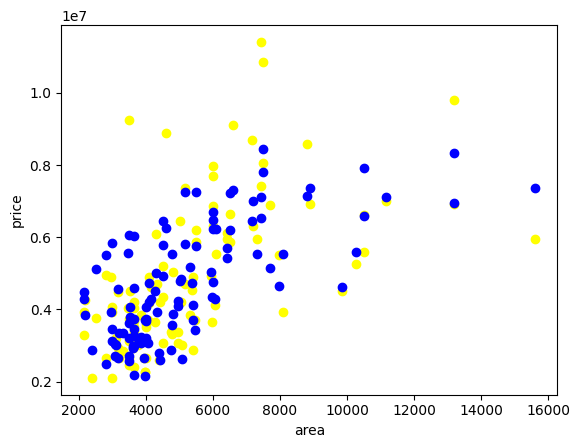

In [ ]:
plt.scatter(x_test['area'], y_test,color='yellow', label='data points')
plt.scatter(x_test['area'], pred, color='blue', label='regression line')
plt.xlabel('area')
plt.ylabel('price')
plt.show()